## Importing Useful Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Cleaning and processing data

In [2]:
df=pd.read_csv('training_data.csv')

In [3]:
df.isnull().sum()

patient_id                     0
standard_lab_parameter_name    0
parameter_value                0
unit                           0
created_at                     0
reference_high                 0
reference_low                  0
age_group                      0
gender                         0
dtype: int64

In [4]:
df.head()

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
0,0,WBC,579.00,10^3/μl,2019-07-02 01:19:03.581,10.0,4.0,old,male
1,1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male
2,2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male
3,3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male
4,4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male


In [5]:
df.dtypes

patient_id                       int64
standard_lab_parameter_name     object
parameter_value                float64
unit                            object
created_at                      object
reference_high                 float64
reference_low                  float64
age_group                       object
gender                          object
dtype: object

In [6]:
df.columns

Index(['patient_id', 'standard_lab_parameter_name', 'parameter_value', 'unit',
       'created_at', 'reference_high', 'reference_low', 'age_group', 'gender'],
      dtype='object')

In [7]:
df = df.set_index(df['patient_id'])

In [8]:
df = df.drop(columns = 'patient_id')

In [9]:
df.head()

,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
patient_id,,,,,,,,
0,WBC,579.00,10^3/μl,2019-07-02 01:19:03.581,10.0,4.0,old,male
1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male
2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male
3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male
4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male


In [10]:
for columns in df:
    print(columns, " :",len(df[columns].unique()))

standard_lab_parameter_name  : 5
parameter_value  : 1410
unit  : 30
created_at  : 5802
reference_high  : 65
reference_low  : 49
age_group  : 4
gender  : 4


In [11]:
df['gender'].unique().tolist()

['male', 'female', 'Female', 'mAle']

In [12]:
df = df.replace('Female','female')
df = df.replace('mAle','male')

## Necessary Plots

/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


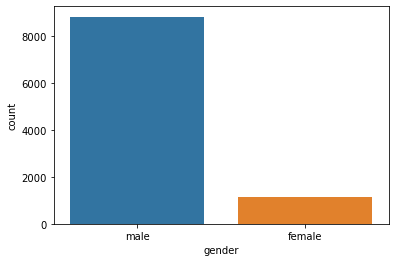

In [13]:
sns.countplot(df['gender'])

In [14]:
df['norm_val'] = df['parameter_value']-df['reference_low']
df['range'] =  df['reference_high']-df['reference_low']
df['norm_val'] = df['norm_val']/df['range']

## Detecting Outliers

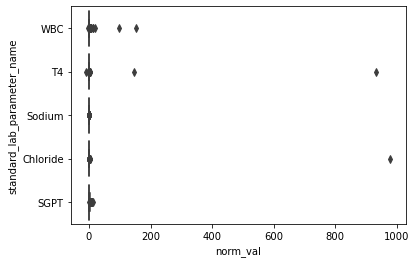

In [15]:
sns.boxplot(x=df['norm_val'],y=df['standard_lab_parameter_name'])

In [16]:
df = df[ (df['norm_val']>=df.quantile(q=0.05)['norm_val']) & (df['norm_val']<=df.quantile(q=0.95)['norm_val']) ]

## Removing Outliers

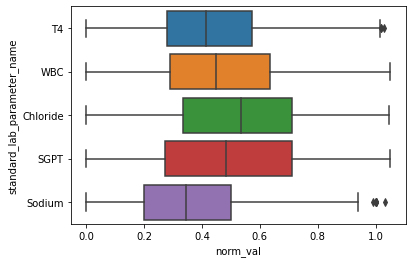

In [17]:
sns.boxplot(x=df['norm_val'],y=df['standard_lab_parameter_name'])

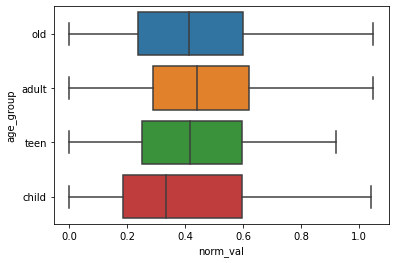

In [18]:
sns.boxplot(x=df['norm_val'],y=df['age_group'])

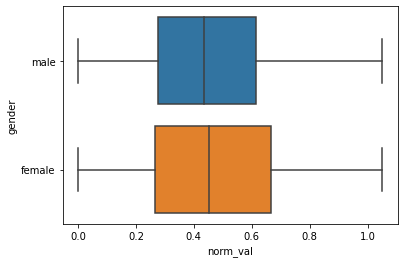

In [19]:
sns.boxplot(x=df['norm_val'],y=df['gender'])

## Introducing Dummy Variables for parameters

In [20]:
df = pd.concat([df,pd.get_dummies(df['standard_lab_parameter_name'],drop_first=True)],axis=1)

In [21]:
df.head()

,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender,norm_val,range,SGPT,Sodium,T4,WBC
patient_id,,,,,,,,,,,,,,
1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male,0.066667,7.5,0,0,1,0
2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male,0.468333,6.0,0,0,0,1
3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male,0.160000,7.5,0,0,1,0
4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male,0.106667,6.0,0,0,0,1
5,T4,8.50,μg/dl,2019-06-30 13:45:08.198299+00:00,12.0,4.5,adult,male,0.533333,7.5,0,0,1,0


## Dropping Unnecessary Column

In [22]:
df = df[['SGPT', 'Sodium', 'T4', 'WBC',
       'norm_val', 'gender']]

/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


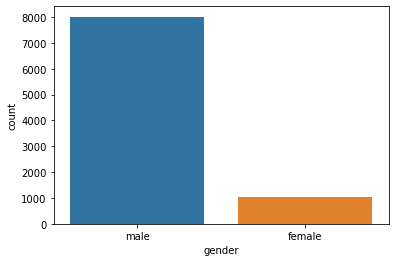

In [23]:
sns.countplot(df['gender'])

## Scatter Plot

/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


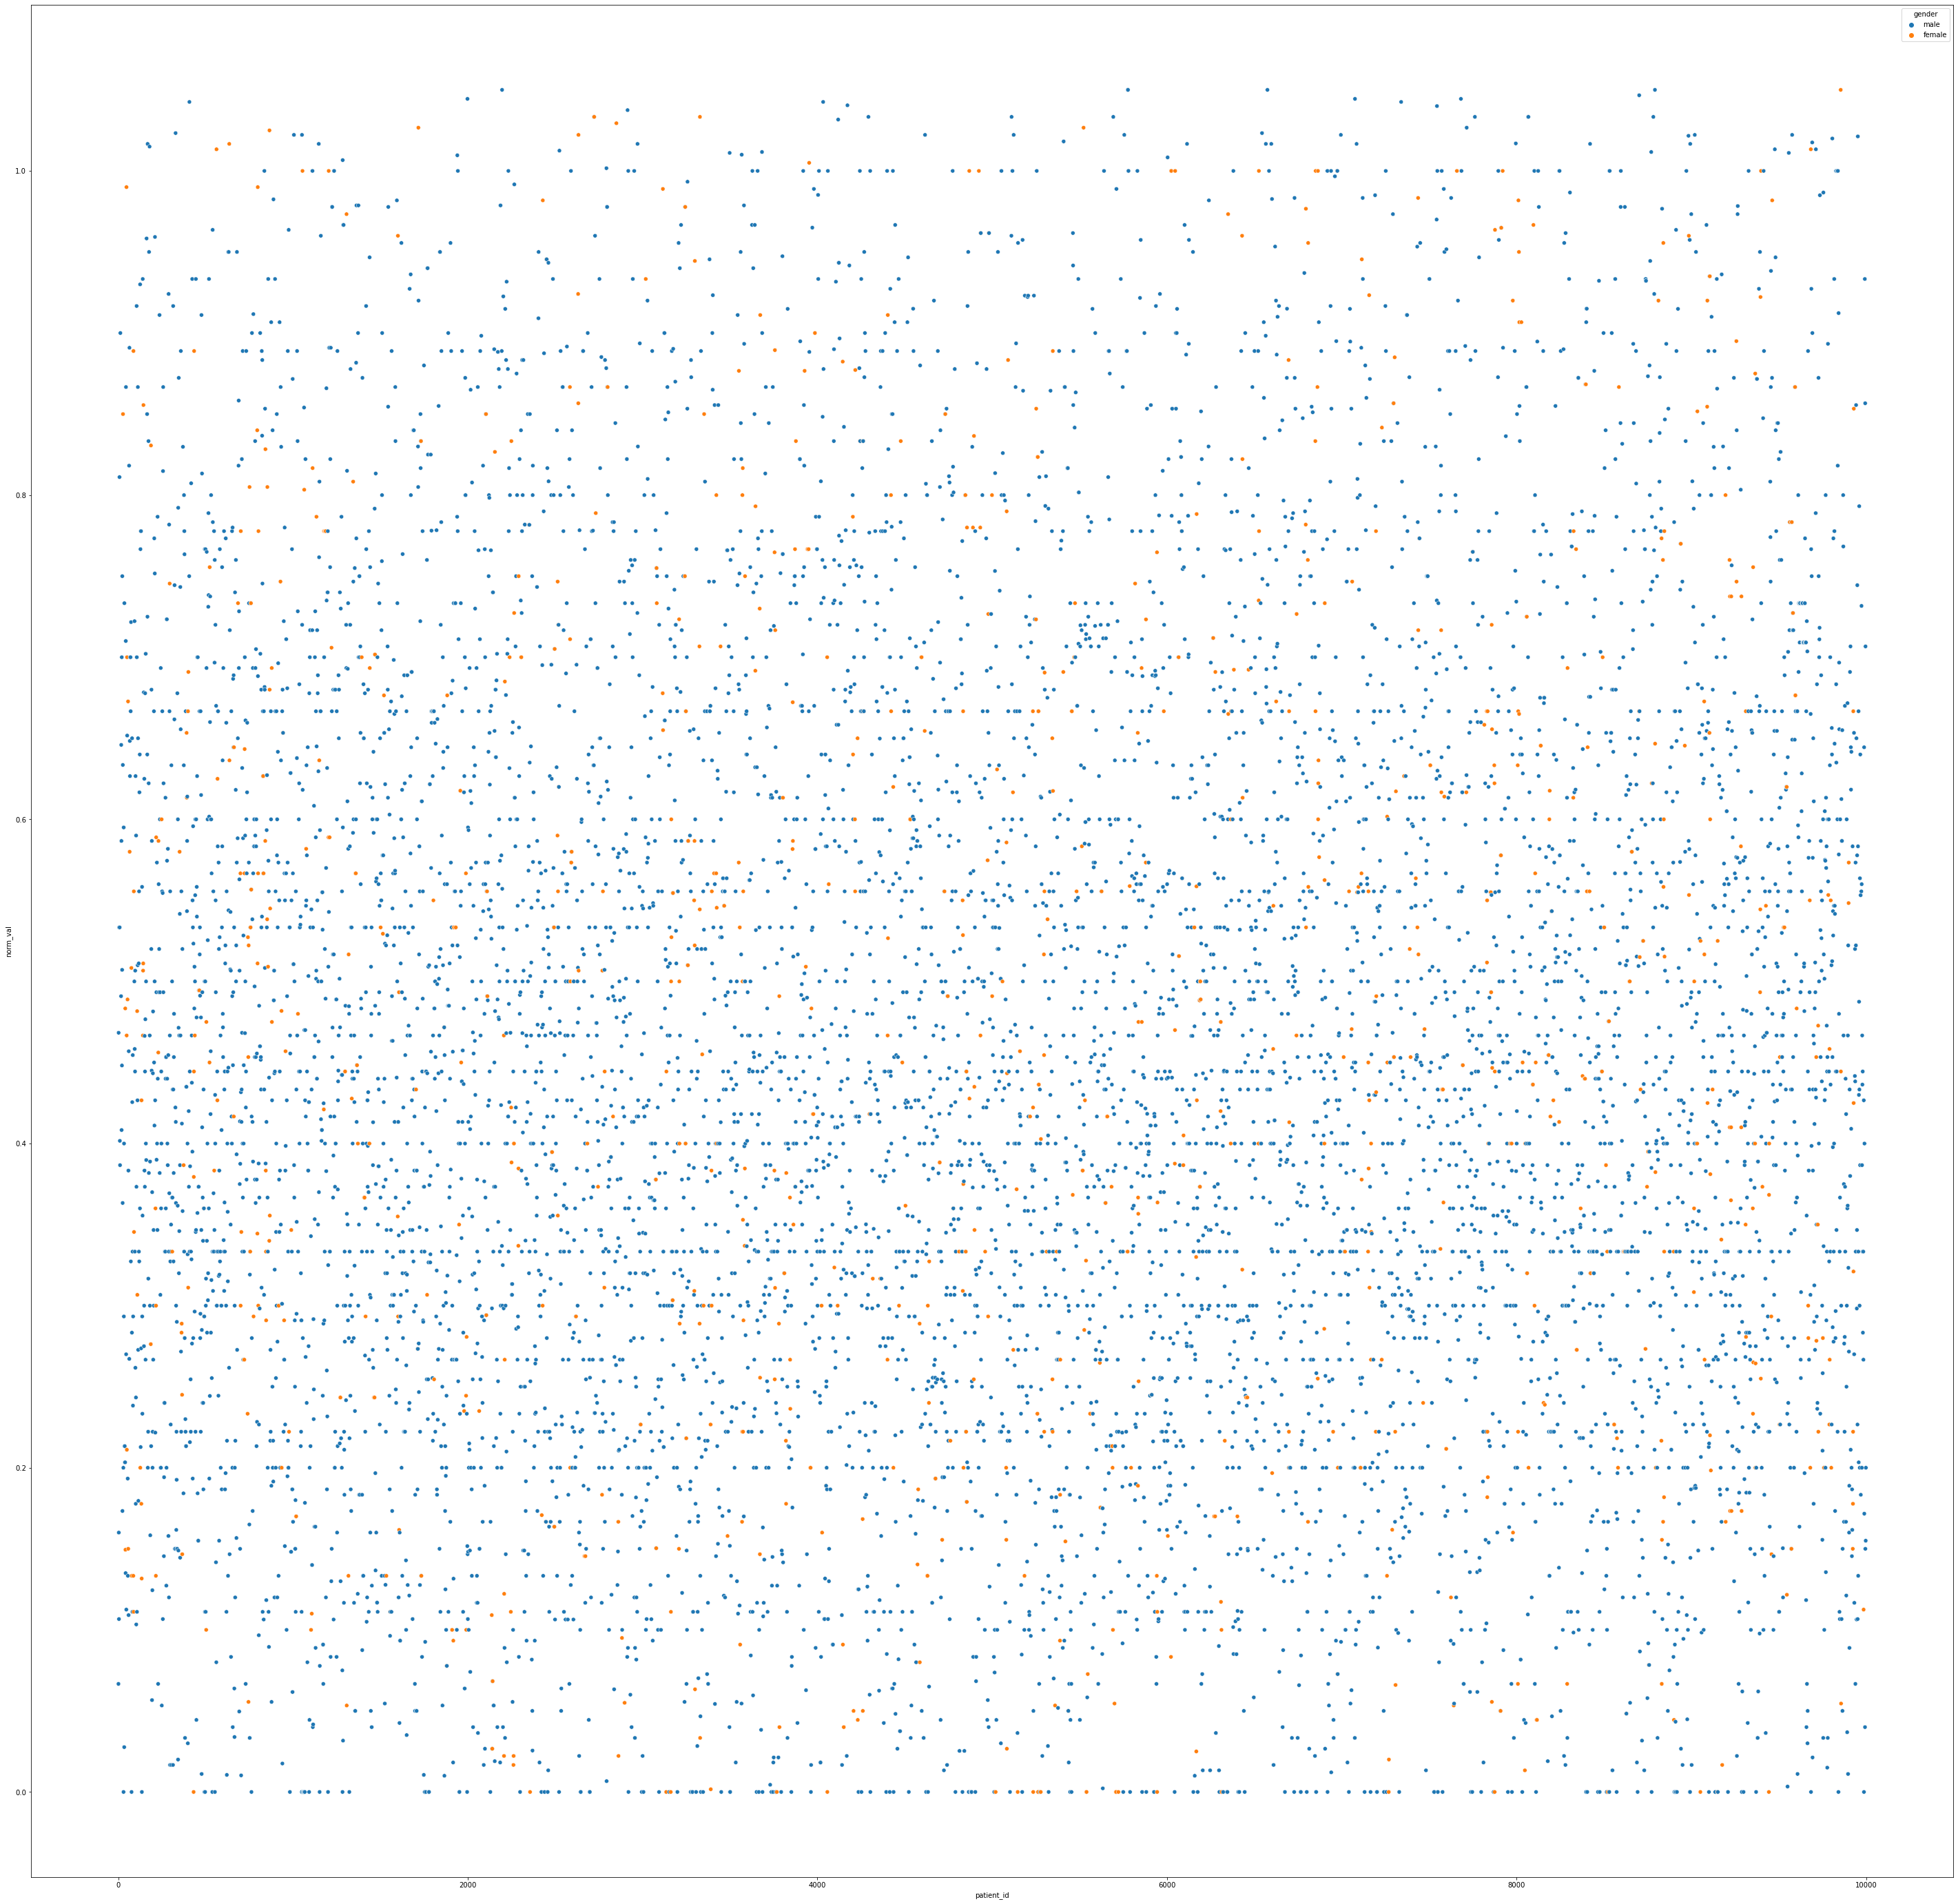

In [24]:
plt.figure(figsize=(50,50))
sns.scatterplot(df.index,df['norm_val'],hue=df['gender'])

## Introducing dummy variable for gender

In [25]:
df = pd.concat([df.drop('gender',axis=1),pd.get_dummies(df['gender'],drop_first=True)],axis=1)

In [26]:
df.head()

,SGPT,Sodium,T4,WBC,norm_val,male
patient_id,,,,,,
1,0,0,1,0,0.066667,1
2,0,0,0,1,0.468333,1
3,0,0,1,0,0.160000,1
4,0,0,0,1,0.106667,1
5,0,0,1,0,0.533333,1


#### There is a huge imbalance between male and female data. There is a chance that any model will learn to be biased towards a particular class. Still there are techniques to hande the imbalance. Therefore I am not suggesting any classification model here because it is needed to choose from different models and tune thier hyper-parameter to get a better accuracy